### Topic includes:

- Analyze investment return distribution
- Build portfolio and reduce risk
- Identifying driving factors of the portfolio returns

### Investment Risk

- A measure of uncertainty of future returns.
- The root of how we measure it lies in historical returns and probability.
- However, it is typically a dispersion of daily returns.
    - Standard deviation or variance
    - Kurtosis
    - Skewness
    - Historical drawdown

### Returns

In terms of stock return, returns are derived from the stock prices. We can compute the returns using two approaches:
- Discrete returns $R_{t}=\frac{(P_t-P_{t-1})}{P_{t-1}}$
- Log returns -> more emphasized in academic resources or when we are interested in continous compounding $R_{t}=\ln{P_t}-ln{P_{t-1}}$
- Log returns aggregate across time, while discrete returns aggregate across assets

In [7]:
import os

NOTEBOOK_DIR = os.getcwd()
PROJECT_DIR = os.path.abspath(os.path.join(NOTEBOOK_DIR, os.pardir))
print(NOTEBOOK_DIR)
print(PROJECT_DIR)

/home/ahmadyusuf/ds_fun/ds-playground/finance/notebooks
/home/ahmadyusuf/ds_fun/ds-playground/finance


In [8]:
os.chdir(PROJECT_DIR)
print(f"Working directory set to: {PROJECT_DIR}")

Working directory set to: /home/ahmadyusuf/ds_fun/ds-playground/finance


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("https://assets.datacamp.com/production/course_6836/datasets/MSFTPrices.csv")
df.to_csv("./data/prm_intro.csv", index=False)

In [17]:
df = pd.read_csv("./data/prm_intro.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4561 non-null   object 
 1   Open      4561 non-null   float64
 2   High      4561 non-null   float64
 3   Low       4561 non-null   float64
 4   Close     4561 non-null   float64
 5   Volume    4561 non-null   int64  
 6   Adjusted  4561 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 249.6+ KB


In [18]:
df = pd.read_csv("./data/prm_intro.csv", parse_dates=["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4561 non-null   datetime64[ns]
 1   Open      4561 non-null   float64       
 2   High      4561 non-null   float64       
 3   Low       4561 non-null   float64       
 4   Close     4561 non-null   float64       
 5   Volume    4561 non-null   int64         
 6   Adjusted  4561 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 249.6 KB


In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [20]:
df = df.sort_values(by="Date", ascending=True)
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


- OHLCV or Open-High-Low-Close-Volume data that we have right now is common in stock data.
- Adjusted close: normalized for stock splits, dividends, and other corporate action -> reflect the true return of stock over time.

In [21]:
df["Returns"] = df["Adjusted"].pct_change()
df.head()

,Open,High,Low,Close,Volume,Adjusted,Returns
Date,,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


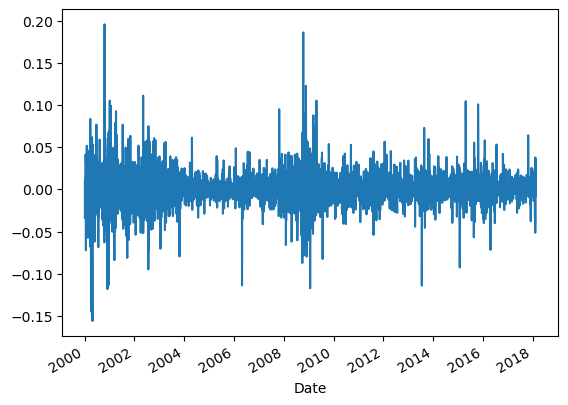

In [22]:
df["Returns"].plot()
plt.show()

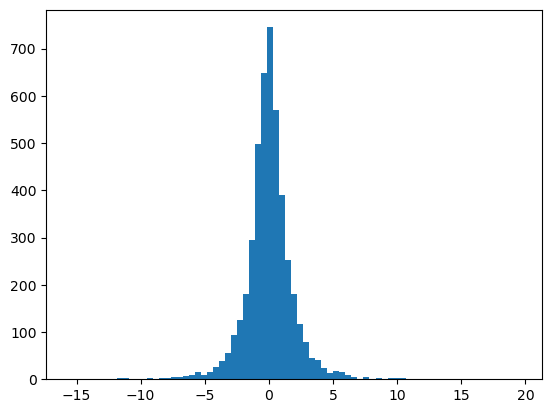

In [23]:
df["Returns"] = df["Returns"] * 100

plt.hist(df["Returns"], bins=75)
plt.show()